In [1]:
# Importing important libraries

# For data cleaning and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For preprocessing and building model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.base import clone 

In [2]:
# Membaca dataset retail
train_features = pd.read_csv('train_features.csv')
train_label = pd.read_csv('train_labels.csv')
test = pd.read_csv('test_features.csv')
format = pd.read_csv('submission_format.csv')

# EDA & Cleaning

In [3]:
train_features.head(20)

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN
5,1952,Magister,Sendiri,94346105.0,0.0,0.0,9.0,33509.0,49228.0,0.0,NaN,1.0,4.0,2.0,0.0,NaN
6,1963,Magister,Sendiri,75313000.0,2.0,NaN,96.0,0.0,14161.0,8092.0,2023.0,1.0,4.0,5.0,0.0,2013-05-03
7,1959,Sarjana,Rencana Menikah,137916316.0,0.0,0.0,21.0,38505.0,1146659.0,192956.0,240718.0,4.0,NaN,6.0,0.0,NaN
8,1957,Sarjana,Sendiri,138069883.0,0.0,0.0,26.0,56486.0,NaN,193754.0,202737.0,3.0,9.0,5.0,0.0,NaN
9,1975,Sarjana,Menikah,37567504.0,1.0,NaN,67.0,19061.0,28067.0,22223.0,14146.0,3.0,2.0,1.0,0.0,NaN


In [4]:
train_features.loc[train_features['jumlah_anak_balita'].isnull()]

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
13,1979,SMP,Menikah,14967000.0,NaN,0.0,65.0,34391.0,30345.0,32368.0,0.0,0.0,5.0,2.0,0.0,2012-11-14
17,1973,Sarjana,Rencana Menikah,119766595.0,NaN,1.0,16.0,20230.0,181594.0,10650.0,51288.0,0.0,7.0,8.0,0.0,NaN
43,1954,Magister,Rencana Menikah,105339251.0,NaN,1.0,58.0,4046.0,154472.0,15851.0,442.0,7.0,9.0,4.0,0.0,NaN
52,1956,Magister,Rencana Menikah,190785436.0,NaN,0.0,59.0,77286.0,1082787.0,112601.0,19302.0,0.0,9.0,6.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,1990,SMA,Menikah,125535217.0,NaN,2.0,41.0,35834.0,NaN,NaN,103129.0,0.0,0.0,4.0,0.0,NaN
3783,1966,Magister,Rencana Menikah,65730000.0,NaN,1.0,10.0,0.0,52598.0,NaN,0.0,2.0,4.0,NaN,0.0,2012-09-07
3792,1956,Doktor,Rencana Menikah,136934000.0,NaN,2.0,86.0,76874.0,NaN,24276.0,0.0,5.0,13.0,3.0,0.0,2013-03-07
3795,1987,SMA,Menikah,165167035.0,NaN,0.0,20.0,NaN,674183.0,54447.0,53628.0,2.0,3.0,8.0,0.0,NaN


In [5]:
train_features.isnull().sum()

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
dtype: int64

In [6]:
train_features.columns

Index(['tahun_kelahiran', 'pendidikan', 'status_pernikahan', 'pendapatan',
       'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja',
       'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue',
       'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan',
       'tanggal_menjadi_anggota'],
      dtype='object')

In [7]:
test.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [8]:
test.columns

Index(['ID', 'tahun_kelahiran', 'pendidikan', 'status_pernikahan',
       'pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja',
       'terakhir_belanja', 'belanja_buah', 'belanja_daging', 'belanja_ikan',
       'belanja_kue', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko',
       'keluhan', 'tanggal_menjadi_anggota'],
      dtype='object')

In [9]:
train_features.dtypes

tahun_kelahiran              int64
pendidikan                  object
status_pernikahan           object
pendapatan                 float64
jumlah_anak_balita         float64
jumlah_anak_remaja         float64
terakhir_belanja           float64
belanja_buah               float64
belanja_daging             float64
belanja_ikan               float64
belanja_kue                float64
pembelian_diskon           float64
pembelian_web              float64
pembelian_toko             float64
keluhan                    float64
tanggal_menjadi_anggota     object
dtype: object

In [10]:
# menggabungkan dataset train

train = pd.concat([train_features, train_label], axis=1)
train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,1
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,0


In [ ]:
# format_copy = format['jumlah_promosi']
# format_copy

In [ ]:
# # menggabungkan dataset test

# test = pd.concat([test, format_copy], axis=1)
# test

In [12]:
train.isnull().sum()

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64

In [13]:
# Menangani null pada pendidikan dan status_pernikahan 

train['pendidikan'].fillna('Unknown', inplace=True)
train['status_pernikahan'].fillna('Unknown', inplace=True)

test['pendidikan'].fillna('Unknown', inplace=True)
test['status_pernikahan'].fillna('Unknown', inplace=True)


In [14]:
# Mengatasi nilai null pada belanja_buah, belanja_daging, belanja_ikan, belanja_kue, dan pendapatan

train['belanja_buah'].fillna(0, inplace=True)
train['belanja_daging'].fillna(0, inplace=True)
train['belanja_ikan'].fillna(0, inplace=True)
train['belanja_kue'].fillna(0, inplace=True)
train['pendapatan'].fillna(0, inplace=True)

test['belanja_daging'].fillna(0, inplace=True)
test['belanja_ikan'].fillna(0, inplace=True)
test['belanja_kue'].fillna(0, inplace=True)
test['belanja_buah'].fillna(0, inplace=True)
test['pendapatan'].fillna(0, inplace=True)

In [15]:
train.isnull().sum()

tahun_kelahiran               0
pendidikan                    0
status_pernikahan             0
pendapatan                    0
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                  0
belanja_daging                0
belanja_ikan                  0
belanja_kue                   0
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64

In [16]:
# meangani null pada jumlah_anak_balita, jumlah_anak_remaja, terakhir_belanja, pembelian_diskon, pembelian_web, pembelian_toko, keluhan

train['jumlah_anak_balita'].fillna(0, inplace=True)
train['jumlah_anak_remaja'].fillna(0, inplace=True)
train['terakhir_belanja'].fillna(0, inplace=True)
train['pembelian_diskon'].fillna(0, inplace=True)
train['pembelian_web'].fillna(0, inplace=True)
train['pembelian_toko'].fillna(0, inplace=True)
train['keluhan'].fillna(0, inplace=True)


test['jumlah_anak_balita'].fillna(0, inplace=True)
test['jumlah_anak_remaja'].fillna(0, inplace=True)
test['terakhir_belanja'].fillna(0, inplace=True)
test['pembelian_diskon'].fillna(0, inplace=True)
test['pembelian_web'].fillna(0, inplace=True)
test['pembelian_toko'].fillna(0, inplace=True)
test['keluhan'].fillna(0, inplace=True)

In [17]:
train.isnull().sum()

tahun_kelahiran               0
pendidikan                    0
status_pernikahan             0
pendapatan                    0
jumlah_anak_balita            0
jumlah_anak_remaja            0
terakhir_belanja              0
belanja_buah                  0
belanja_daging                0
belanja_ikan                  0
belanja_kue                   0
pembelian_diskon              0
pembelian_web                 0
pembelian_toko                0
keluhan                       0
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64

In [18]:
# Menangani tanggal_menjadi_anggota

train['tanggal_menjadi_anggota'].fillna('Unknown', inplace=True)

test['tanggal_menjadi_anggota'].fillna('Unknown', inplace=True)

In [19]:
train.isnull().sum()

tahun_kelahiran            0
pendidikan                 0
status_pernikahan          0
pendapatan                 0
jumlah_anak_balita         0
jumlah_anak_remaja         0
terakhir_belanja           0
belanja_buah               0
belanja_daging             0
belanja_ikan               0
belanja_kue                0
pembelian_diskon           0
pembelian_web              0
pembelian_toko             0
keluhan                    0
tanggal_menjadi_anggota    0
jumlah_promosi             0
dtype: int64

In [20]:
test.isnull().sum()

ID                         0
tahun_kelahiran            0
pendidikan                 0
status_pernikahan          0
pendapatan                 0
jumlah_anak_balita         0
jumlah_anak_remaja         0
terakhir_belanja           0
belanja_buah               0
belanja_daging             0
belanja_ikan               0
belanja_kue                0
pembelian_diskon           0
pembelian_web              0
pembelian_toko             0
keluhan                    0
tanggal_menjadi_anggota    0
dtype: int64

In [21]:
for col in train.columns:
    print(col)
    print(train[col].unique())
    print()

tahun_kelahiran
[1979 1950 1966 1961 1970 1952 1963 1959 1957 1975 1953 1968 1983 1977
 1973 1969 1980 1965 1960 1982 1971 1972 1958 1944 1986 1962 1967 1984
 1976 1964 1954 1956 1978 1991 1981 1946 1974 1947 1955 1989 1945 1948
 1990 1951 1988 1949 1985 1943 1996 1987 1909 1993 1992 1925 1912 1999
 1941 1995 1994 1916 1942 1998 1899 1902 1922 2000 1918 1920 1997 1929
 1940 1932 1924 1900 1914 1908]

pendidikan
['Sarjana' 'Magister' 'SMA' 'SMP' 'Doktor' 'Unknown' '5']

status_pernikahan
['Rencana Menikah' 'Menikah' 'Sendiri' 'Cerai' 'Unknown' 'Cerai Mati' '5']

pendapatan
[0.00000000e+00 8.40630000e+07 1.27532564e+08 ... 1.04621000e+08
 1.10850000e+08 1.30512000e+08]

jumlah_anak_balita
[0. 1. 2.]

jumlah_anak_remaja
[1. 0. 2.]

terakhir_belanja
[  0.  70.  45.  90.  78.   9.  96.  21.  26.  67.  59.  57.   5.  65.
  61.  25.  16.  50.  69.  84.  56.  54.  17.  51.  29.  73.  60.  87.
  62.  41.  35.   3.  36.  58.  64.  55.  12.  19.  30.  28.  11. 114.
   4.  76.  85.  15.  80.  81. 

In [22]:
for col in test.columns:
    print(col)
    print(test[col].unique())
    print()

ID
[2241 2274 1107 ... 3478   89 2151]

tahun_kelahiran
[1957 1968 1971 1974 1972 1963 1956 1954 1946 1983 1985 1959 1962 1961
 1978 1979 1984 1969 1951 1960 1990 1988 1970 1989 1967 1981 1977 1945
 1965 1980 1976 1966 1975 1982 1958 1987 1950 1953 1952 1973 1992 1986
 1941 1955 1949 1964 1991 1948 1913 1904 1947 1943 1903 1994 1998 1993
 1902 1933 1935 1944 1938 1932 1999 1934 1942 1937 1939 2000 1892 2005
 1995 1922 1929 2009 2006 1997 1918 1940 1996 1914 1912 1915 1926 1924
 1920]

pendidikan
['Sarjana' 'Doktor' 'SMA' 'Magister' 'Unknown' 'SMP' '5']

status_pernikahan
['Unknown' 'Menikah' 'Rencana Menikah' 'Sendiri' 'Cerai Mati' 'Cerai' '5']

pendapatan
[1.20660151e+08 1.63551821e+08 2.98570000e+07 ... 8.40589230e+07
 1.06301000e+08 1.40353000e+08]

jumlah_anak_balita
[0. 1. 2.]

jumlah_anak_remaja
[1. 0. 2.]

terakhir_belanja
[ 63.  58.  34.  82.  28.  32.  46.  37.  11.  73.  12.  22.  75.  51.
  74.  24.  33.  66.   4.  52.  15.  41.  31. 113.  18.  68.   0.  29.
  49.  67.  94. 

In [23]:
# menangani nilai '5' pada pendidikan dan status_pernikahan

train['pendidikan'] = train['pendidikan'].replace('5', 'Unknown')
train['status_pernikahan'] = train['status_pernikahan'].replace('5', 'Unknown')

test['status_pernikahan'] = test['status_pernikahan'].replace('5', 'Unknown')
test['pendidikan'] = test['pendidikan'].replace('5', 'Unknown')

In [24]:
for col in train.columns:
    print(col)
    print(train[col].unique())
    print()

tahun_kelahiran
[1979 1950 1966 1961 1970 1952 1963 1959 1957 1975 1953 1968 1983 1977
 1973 1969 1980 1965 1960 1982 1971 1972 1958 1944 1986 1962 1967 1984
 1976 1964 1954 1956 1978 1991 1981 1946 1974 1947 1955 1989 1945 1948
 1990 1951 1988 1949 1985 1943 1996 1987 1909 1993 1992 1925 1912 1999
 1941 1995 1994 1916 1942 1998 1899 1902 1922 2000 1918 1920 1997 1929
 1940 1932 1924 1900 1914 1908]

pendidikan
['Sarjana' 'Magister' 'SMA' 'SMP' 'Doktor' 'Unknown']

status_pernikahan
['Rencana Menikah' 'Menikah' 'Sendiri' 'Cerai' 'Unknown' 'Cerai Mati']

pendapatan
[0.00000000e+00 8.40630000e+07 1.27532564e+08 ... 1.04621000e+08
 1.10850000e+08 1.30512000e+08]

jumlah_anak_balita
[0. 1. 2.]

jumlah_anak_remaja
[1. 0. 2.]

terakhir_belanja
[  0.  70.  45.  90.  78.   9.  96.  21.  26.  67.  59.  57.   5.  65.
  61.  25.  16.  50.  69.  84.  56.  54.  17.  51.  29.  73.  60.  87.
  62.  41.  35.   3.  36.  58.  64.  55.  12.  19.  30.  28.  11. 114.
   4.  76.  85.  15.  80.  81.  37.  47

In [25]:
for col in test.columns:
    print(col)
    print(test[col].unique())
    print()

ID
[2241 2274 1107 ... 3478   89 2151]

tahun_kelahiran
[1957 1968 1971 1974 1972 1963 1956 1954 1946 1983 1985 1959 1962 1961
 1978 1979 1984 1969 1951 1960 1990 1988 1970 1989 1967 1981 1977 1945
 1965 1980 1976 1966 1975 1982 1958 1987 1950 1953 1952 1973 1992 1986
 1941 1955 1949 1964 1991 1948 1913 1904 1947 1943 1903 1994 1998 1993
 1902 1933 1935 1944 1938 1932 1999 1934 1942 1937 1939 2000 1892 2005
 1995 1922 1929 2009 2006 1997 1918 1940 1996 1914 1912 1915 1926 1924
 1920]

pendidikan
['Sarjana' 'Doktor' 'SMA' 'Magister' 'Unknown' 'SMP']

status_pernikahan
['Unknown' 'Menikah' 'Rencana Menikah' 'Sendiri' 'Cerai Mati' 'Cerai']

pendapatan
[1.20660151e+08 1.63551821e+08 2.98570000e+07 ... 8.40589230e+07
 1.06301000e+08 1.40353000e+08]

jumlah_anak_balita
[0. 1. 2.]

jumlah_anak_remaja
[1. 0. 2.]

terakhir_belanja
[ 63.  58.  34.  82.  28.  32.  46.  37.  11.  73.  12.  22.  75.  51.
  74.  24.  33.  66.   4.  52.  15.  41.  31. 113.  18.  68.   0.  29.
  49.  67.  94.  23.  86

In [26]:
# Menambahkan kolom baru di train

train['TotalAmount'] = train['belanja_buah'] + train['belanja_daging'] + train['belanja_ikan'] + train['belanja_kue']
train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,TotalAmount
0,1979,Sarjana,Rencana Menikah,0.0,0.0,1.0,0.0,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2,382347.0
1,1950,Sarjana,Rencana Menikah,84063000.0,0.0,0.0,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0,151725.0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,Unknown,1,624985.0
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,Unknown,4,1973840.0
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,Unknown,4,476553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,Unknown,5,41686.0
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,0.0,0.0,3.0,6.0,3.0,0.0,2014-06-09,1,50575.0
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0,72828.0
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,0.0,4.0,5.0,4.0,0.0,2013-06-30,0,113288.0


In [27]:
# Menambahkan kolom baru di test

test['TotalAmount'] = test['belanja_buah'] + test['belanja_daging'] + test['belanja_ikan'] + test['belanja_kue']
test

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,TotalAmount
0,2241,1957,Sarjana,Unknown,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,Unknown,962173.0
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,Unknown,493573.0
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06,86989.0
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,Unknown,140678.0
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,Unknown,2103642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,271,1984,Magister,Sendiri,66320000.0,1.0,0.0,19.0,12138.0,38437.0,0.0,10115.0,4.0,0.0,6.0,1.0,2014-03-17,60690.0
3814,3334,1972,Sarjana,Menikah,159651946.0,0.0,0.0,90.0,32119.0,1032587.0,176078.0,78693.0,0.0,6.0,8.0,0.0,Unknown,1319477.0
3815,3478,1968,Magister,Rencana Menikah,84058923.0,0.0,1.0,46.0,8198.0,47595.0,11392.0,10540.0,0.0,0.0,1.0,0.0,Unknown,77725.0
3816,89,1966,Sarjana,Rencana Menikah,106301000.0,0.0,1.0,74.0,16184.0,78897.0,0.0,0.0,3.0,5.0,3.0,0.0,2014-01-20,95081.0


In [28]:
# train.belanja_kue.min()

# Outlier

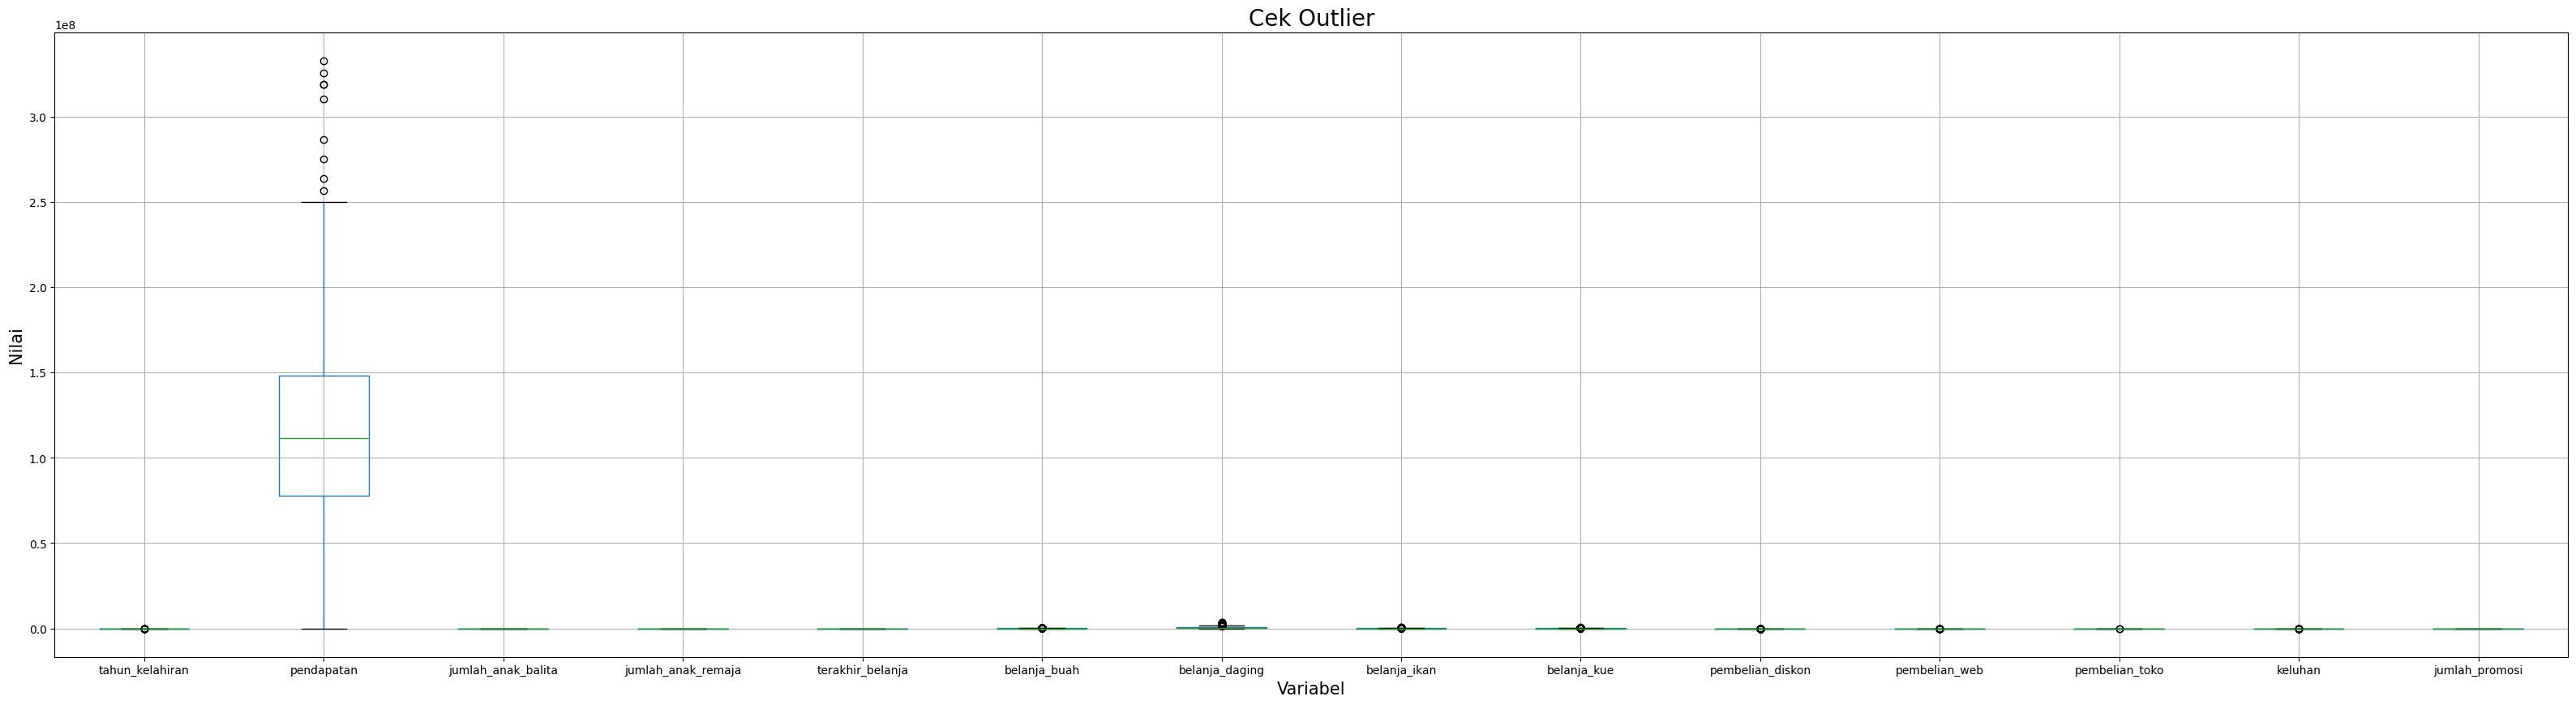

In [29]:
# check outlier
cols = ['tahun_kelahiran', 'pendidikan', 'status_pernikahan', 'pendapatan',
       'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja',
       'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue',
       'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan',
       'tanggal_menjadi_anggota', 'jumlah_promosi']

# menentukan ukuran gambar plot
train[cols].boxplot(figsize=(40,10))

plt.title('Cek Outlier', fontsize=20)
plt.xlabel('Variabel', fontsize=15)
plt.ylabel('Nilai', fontsize=15)
plt.show()

## Handling Outlier

In [30]:
# Handling 'pendapatan'
q1 = train['pendapatan'].quantile(0.25)
q3 = train['pendapatan'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)

#Mengganti nilai 'pendapatan' yang lebih besar dari batas atas dengan nilai batas atas itu sendiri. Ini dilakukan agar tidak ada nilai yang melebihi batas atas.
train['pendapatan'] = np.where(train['pendapatan'] > batas_atas, batas_atas, train['pendapatan'])

#Mengganti nilai 'pendapatan' yang lebih kecil dari batas bawah dengan nilai batas bawah itu sendiri. Ini dilakukan agar tidak ada nilai yang kurang dari batas bawah.
train['pendapatan'] = np.where(train['pendapatan'] < batas_bawah, batas_bawah, train['pendapatan'])

batas_bawah :  -27240442.0
batas_atas :  253069790.0


In [31]:
# Handling 'belanja_buah'
q1 = train['belanja_buah'].quantile(0.25)
q3 = train['belanja_buah'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)

#Mengganti nilai 'belanja_buah' yang lebih besar dari batas atas dengan nilai batas atas itu sendiri. Ini dilakukan agar tidak ada nilai yang melebihi batas atas.
train['belanja_buah'] = np.where(train['belanja_buah'] > batas_atas, batas_atas, train['belanja_buah'])

#Mengganti nilai 'belanja_buah' yang lebih kecil dari batas bawah dengan nilai batas bawah itu sendiri. Ini dilakukan agar tidak ada nilai yang kurang dari batas bawah.
train['belanja_buah'] = np.where(train['belanja_buah'] < batas_bawah, batas_bawah, train['belanja_buah'])

batas_bawah :  -107437.5
batas_atas :  195246.5


In [32]:
# Handling 'belanja_daging'
q1 = train['belanja_daging'].quantile(0.25)
q3 = train['belanja_daging'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)

#Mengganti nilai 'belanja_daging' yang lebih besar dari batas atas dengan nilai batas atas itu sendiri. Ini dilakukan agar tidak ada nilai yang melebihi batas atas.
train['belanja_daging'] = np.where(train['belanja_daging'] > batas_atas, batas_atas, train['belanja_daging'])

#Mengganti nilai 'belanja_daging' yang lebih kecil dari batas bawah dengan nilai batas bawah itu sendiri. Ini dilakukan agar tidak ada nilai yang kurang dari batas bawah.
train['belanja_daging'] = np.where(train['belanja_daging'] < batas_bawah, batas_bawah, train['belanja_daging'])

batas_bawah :  -862958.5
batas_atas :  1542405.5


In [33]:
# Handling 'belanja_ikan'
q1 = train['belanja_ikan'].quantile(0.25)
q3 = train['belanja_ikan'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)

#Mengganti nilai 'belanja_ikan' yang lebih besar dari batas atas dengan nilai batas atas itu sendiri. Ini dilakukan agar tidak ada nilai yang melebihi batas atas.
train['belanja_ikan'] = np.where(train['belanja_ikan'] > batas_atas, batas_atas, train['belanja_ikan'])

#Mengganti nilai 'belanja_ikan' yang lebih kecil dari batas bawah dengan nilai batas bawah itu sendiri. Ini dilakukan agar tidak ada nilai yang kurang dari batas bawah.
train['belanja_ikan'] = np.where(train['belanja_ikan'] < batas_bawah, batas_bawah, train['belanja_ikan'])

batas_bawah :  -153010.5
batas_atas :  275865.5


In [34]:
# Handling 'belanja_kue'
q1 = train['belanja_kue'].quantile(0.25)
q3 = train['belanja_kue'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)

#Mengganti nilai 'belanja_kue' yang lebih besar dari batas atas dengan nilai batas atas itu sendiri. Ini dilakukan agar tidak ada nilai yang melebihi batas atas.
train['belanja_kue'] = np.where(train['belanja_kue'] > batas_atas, batas_atas, train['belanja_kue'])

#Mengganti nilai 'belanja_kue' yang lebih kecil dari batas bawah dengan nilai batas bawah itu sendiri. Ini dilakukan agar tidak ada nilai yang kurang dari batas bawah.
train['belanja_kue'] = np.where(train['belanja_kue'] < batas_bawah, batas_bawah, train['belanja_kue'])

batas_bawah :  -112625.5
batas_atas :  202810.5


In [35]:
# Handling 'pembelian_diskon'
q1 = train['pembelian_diskon'].quantile(0.25)
q3 = train['pembelian_diskon'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)

#Mengganti nilai 'pembelian_diskon' yang lebih besar dari batas atas dengan nilai batas atas itu sendiri. Ini dilakukan agar tidak ada nilai yang melebihi batas atas.
train['pembelian_diskon'] = np.where(train['pembelian_diskon'] > batas_atas, batas_atas, train['pembelian_diskon'])

#Mengganti nilai 'pembelian_diskon' yang lebih kecil dari batas bawah dengan nilai batas bawah itu sendiri. Ini dilakukan agar tidak ada nilai yang kurang dari batas bawah.
train['pembelian_diskon'] = np.where(train['pembelian_diskon'] < batas_bawah, batas_bawah, train['pembelian_diskon'])

batas_bawah :  -4.5
batas_atas :  7.5


In [36]:
# Handling 'pembelian_web'
q1 = train['pembelian_web'].quantile(0.25)
q3 = train['pembelian_web'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)

#Mengganti nilai 'pembelian_web' yang lebih besar dari batas atas dengan nilai batas atas itu sendiri. Ini dilakukan agar tidak ada nilai yang melebihi batas atas.
train['pembelian_web'] = np.where(train['pembelian_web'] > batas_atas, batas_atas, train['pembelian_web'])

#Mengganti nilai 'pembelian_web' yang lebih kecil dari batas bawah dengan nilai batas bawah itu sendiri. Ini dilakukan agar tidak ada nilai yang kurang dari batas bawah.
train['pembelian_web'] = np.where(train['pembelian_web'] < batas_bawah, batas_bawah, train['pembelian_web'])

batas_bawah :  -4.0
batas_atas :  12.0


In [37]:
# Handling 'pembelian_toko'
q1 = train['pembelian_toko'].quantile(0.25)
q3 = train['pembelian_toko'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)

#Mengganti nilai 'pembelian_toko' yang lebih besar dari batas atas dengan nilai batas atas itu sendiri. Ini dilakukan agar tidak ada nilai yang melebihi batas atas.
train['pembelian_toko'] = np.where(train['pembelian_toko'] > batas_atas, batas_atas, train['pembelian_toko'])

#Mengganti nilai 'pembelian_toko' yang lebih kecil dari batas bawah dengan nilai batas bawah itu sendiri. Ini dilakukan agar tidak ada nilai yang kurang dari batas bawah.
train['pembelian_toko'] = np.where(train['pembelian_toko'] < batas_bawah, batas_bawah, train['pembelian_toko'])

batas_bawah :  -4.5
batas_atas :  15.5


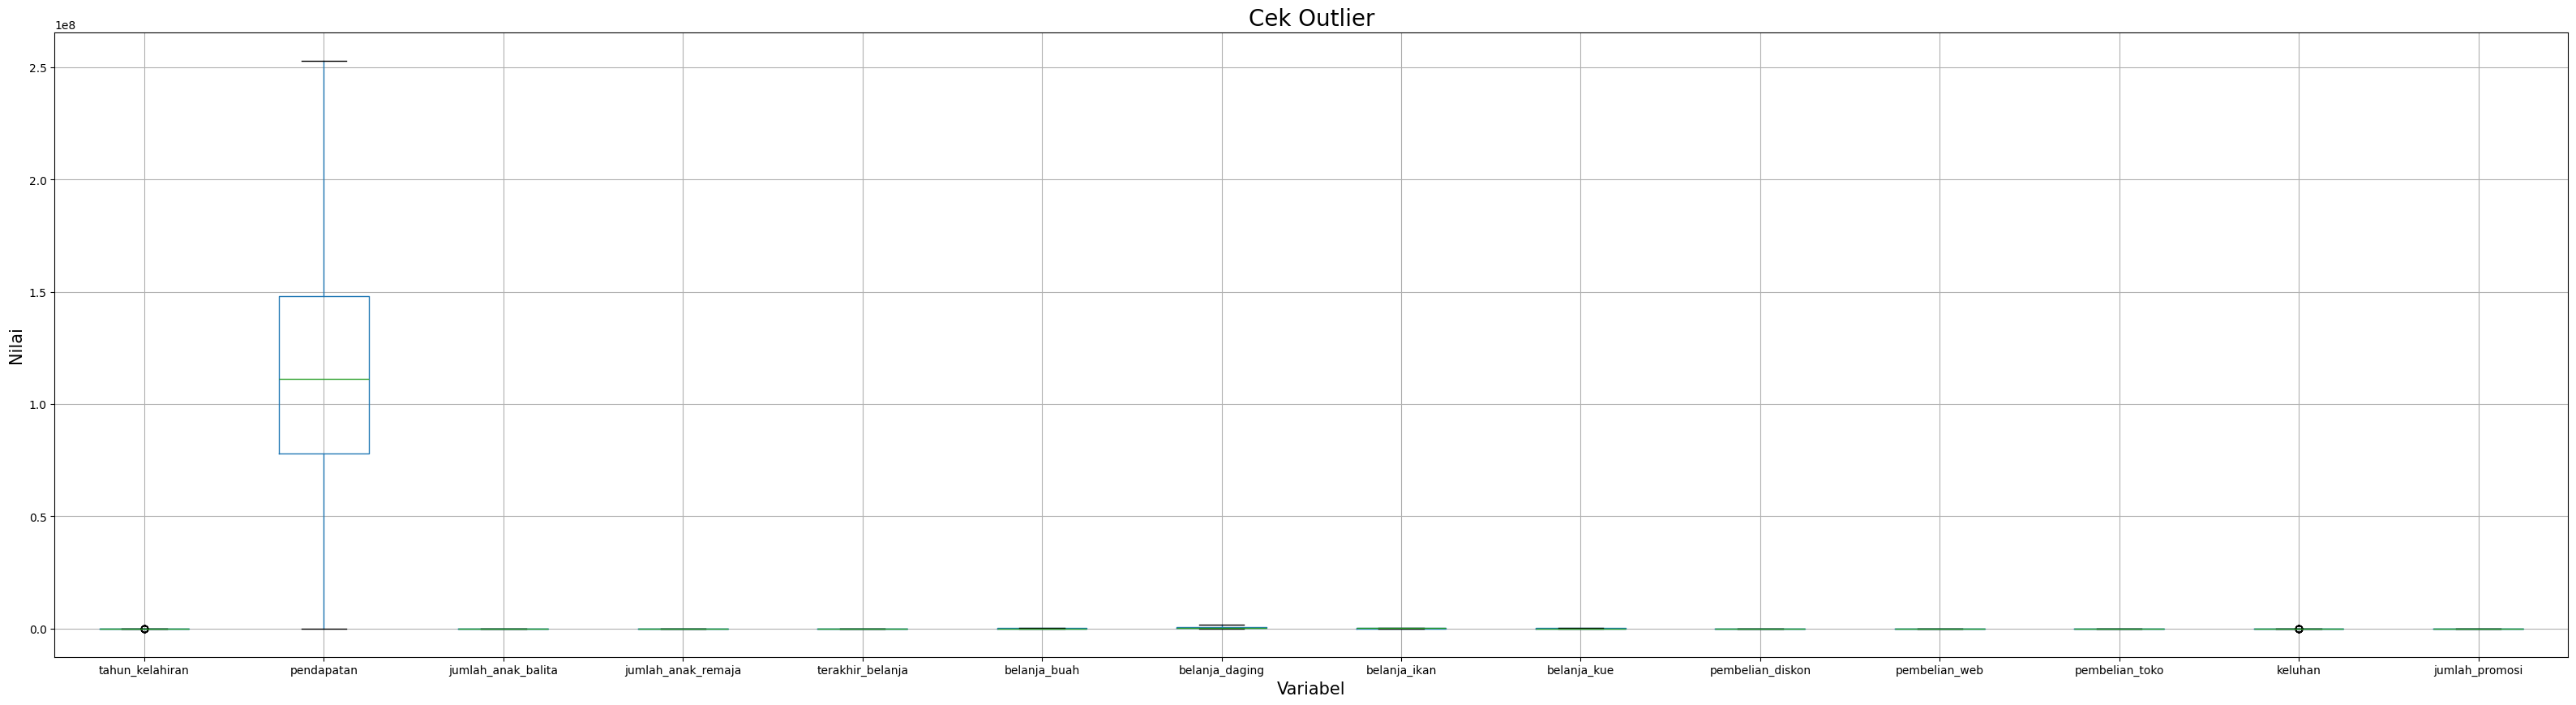

In [38]:
# Setelah di handling
cols = ['tahun_kelahiran', 'pendidikan', 'status_pernikahan', 'pendapatan',
       'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja',
       'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue',
       'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan',
       'tanggal_menjadi_anggota', 'jumlah_promosi']

train[cols].boxplot(figsize=(40,10))
plt.title('Cek Outlier', fontsize=20)
plt.xlabel('Variabel', fontsize=15)
plt.ylabel('Nilai', fontsize=15)
plt.show()

# Encoding

In [39]:
# Buat dictionary untuk mapping nilai pendidikan ke angka
mapping_pendidikan = {'SMP': 1, 'SMA': 2, 'Sarjana': 3, 'Magister': 4,
           'Doktor': 5, 'Unknown' : 6}

# Encode kolom 'pendidikan' menggunakan mapping
train['pendidikan'] = train['pendidikan'].map(mapping_pendidikan)
train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,TotalAmount
0,1979,3,Rencana Menikah,0.0,0.0,1.0,0.0,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2,382347.0
1,1950,3,Rencana Menikah,84063000.0,0.0,0.0,70.0,6069.0,44506.0,80920.0,20230.0,7.5,6.0,4.0,0.0,2013-03-17,0,151725.0
2,1966,3,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,Unknown,1,624985.0
3,1961,4,Rencana Menikah,165579620.0,0.0,0.0,90.0,195246.5,1542405.5,27725.0,125868.0,0.0,7.0,8.0,0.0,Unknown,4,1973840.0
4,1970,3,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,Unknown,4,476553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,4,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,Unknown,5,41686.0
3813,1947,5,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,0.0,0.0,3.0,6.0,3.0,0.0,2014-06-09,1,50575.0
3814,1974,4,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0,72828.0
3815,1957,2,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,0.0,4.0,5.0,4.0,0.0,2013-06-30,0,113288.0


In [40]:
# Encode kolom 'pendidikan' menggunakan mapping
test['pendidikan'] = test['pendidikan'].map(mapping_pendidikan)
test

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,TotalAmount
0,2241,1957,3,Unknown,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,Unknown,962173.0
1,2274,1968,5,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,Unknown,493573.0
2,1107,1968,2,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06,86989.0
3,4478,1971,5,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,Unknown,140678.0
4,5080,1974,3,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,Unknown,2103642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,271,1984,4,Sendiri,66320000.0,1.0,0.0,19.0,12138.0,38437.0,0.0,10115.0,4.0,0.0,6.0,1.0,2014-03-17,60690.0
3814,3334,1972,3,Menikah,159651946.0,0.0,0.0,90.0,32119.0,1032587.0,176078.0,78693.0,0.0,6.0,8.0,0.0,Unknown,1319477.0
3815,3478,1968,4,Rencana Menikah,84058923.0,0.0,1.0,46.0,8198.0,47595.0,11392.0,10540.0,0.0,0.0,1.0,0.0,Unknown,77725.0
3816,89,1966,3,Rencana Menikah,106301000.0,0.0,1.0,74.0,16184.0,78897.0,0.0,0.0,3.0,5.0,3.0,0.0,2014-01-20,95081.0


In [41]:
# Buat dictionary untuk mapping nilai status_pernikahan ke angka
mapping_status = {'Sendiri': 1, 'Rencana Menikah': 2, 'Menikah': 3, 'Cerai': 4,
           'Cerai Mati': 5, 'Unknown': 6}

# Encode kolom 'status_pernikahan' menggunakan mapping
train['status_pernikahan'] = train['status_pernikahan'].map(mapping_status)
train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,TotalAmount
0,1979,3,2,0.0,0.0,1.0,0.0,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2,382347.0
1,1950,3,2,84063000.0,0.0,0.0,70.0,6069.0,44506.0,80920.0,20230.0,7.5,6.0,4.0,0.0,2013-03-17,0,151725.0
2,1966,3,3,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,Unknown,1,624985.0
3,1961,4,2,165579620.0,0.0,0.0,90.0,195246.5,1542405.5,27725.0,125868.0,0.0,7.0,8.0,0.0,Unknown,4,1973840.0
4,1970,3,2,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,Unknown,4,476553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,4,3,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,Unknown,5,41686.0
3813,1947,5,2,109306000.0,0.0,1.0,44.0,0.0,50575.0,0.0,0.0,3.0,6.0,3.0,0.0,2014-06-09,1,50575.0
3814,1974,4,3,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0,72828.0
3815,1957,2,2,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,0.0,4.0,5.0,4.0,0.0,2013-06-30,0,113288.0


In [42]:
# Encode kolom 'status_pernikahan' menggunakan mapping
test['status_pernikahan'] = test['status_pernikahan'].map(mapping_status)
test

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,TotalAmount
0,2241,1957,3,6,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,Unknown,962173.0
1,2274,1968,5,3,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,Unknown,493573.0
2,1107,1968,2,3,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06,86989.0
3,4478,1971,5,3,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,Unknown,140678.0
4,5080,1974,3,2,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,Unknown,2103642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,271,1984,4,1,66320000.0,1.0,0.0,19.0,12138.0,38437.0,0.0,10115.0,4.0,0.0,6.0,1.0,2014-03-17,60690.0
3814,3334,1972,3,3,159651946.0,0.0,0.0,90.0,32119.0,1032587.0,176078.0,78693.0,0.0,6.0,8.0,0.0,Unknown,1319477.0
3815,3478,1968,4,2,84058923.0,0.0,1.0,46.0,8198.0,47595.0,11392.0,10540.0,0.0,0.0,1.0,0.0,Unknown,77725.0
3816,89,1966,3,2,106301000.0,0.0,1.0,74.0,16184.0,78897.0,0.0,0.0,3.0,5.0,3.0,0.0,2014-01-20,95081.0


In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train.tanggal_menjadi_anggota = le.fit_transform(train.tanggal_menjadi_anggota)
test.tanggal_menjadi_anggota = le.fit_transform(test.tanggal_menjadi_anggota)

In [44]:
for col in train.columns:
    print(col)
    print(train[col].unique())
    print()

tahun_kelahiran
[1979 1950 1966 1961 1970 1952 1963 1959 1957 1975 1953 1968 1983 1977
 1973 1969 1980 1965 1960 1982 1971 1972 1958 1944 1986 1962 1967 1984
 1976 1964 1954 1956 1978 1991 1981 1946 1974 1947 1955 1989 1945 1948
 1990 1951 1988 1949 1985 1943 1996 1987 1909 1993 1992 1925 1912 1999
 1941 1995 1994 1916 1942 1998 1899 1902 1922 2000 1918 1920 1997 1929
 1940 1932 1924 1900 1914 1908]

pendidikan
[3 4 2 1 5 6]

status_pernikahan
[2 3 1 4 6 5]

pendapatan
[0.00000000e+00 8.40630000e+07 1.27532564e+08 ... 1.04621000e+08
 1.10850000e+08 1.30512000e+08]

jumlah_anak_balita
[0. 1. 2.]

jumlah_anak_remaja
[1. 0. 2.]

terakhir_belanja
[  0.  70.  45.  90.  78.   9.  96.  21.  26.  67.  59.  57.   5.  65.
  61.  25.  16.  50.  69.  84.  56.  54.  17.  51.  29.  73.  60.  87.
  62.  41.  35.   3.  36.  58.  64.  55.  12.  19.  30.  28.  11. 114.
   4.  76.  85.  15.  80.  81.  37.  47.  18.  20.   6.  77.  22.  32.
  75.  43.  31.  23.  44.  66.  68.  79.  99.  39.  46.  33.  27.

In [45]:
for col in test.columns:
    print(col)
    print(test[col].unique())
    print()

ID
[2241 2274 1107 ... 3478   89 2151]

tahun_kelahiran
[1957 1968 1971 1974 1972 1963 1956 1954 1946 1983 1985 1959 1962 1961
 1978 1979 1984 1969 1951 1960 1990 1988 1970 1989 1967 1981 1977 1945
 1965 1980 1976 1966 1975 1982 1958 1987 1950 1953 1952 1973 1992 1986
 1941 1955 1949 1964 1991 1948 1913 1904 1947 1943 1903 1994 1998 1993
 1902 1933 1935 1944 1938 1932 1999 1934 1942 1937 1939 2000 1892 2005
 1995 1922 1929 2009 2006 1997 1918 1940 1996 1914 1912 1915 1926 1924
 1920]

pendidikan
[3 5 2 4 6 1]

status_pernikahan
[6 3 2 1 5 4]

pendapatan
[1.20660151e+08 1.63551821e+08 2.98570000e+07 ... 8.40589230e+07
 1.06301000e+08 1.40353000e+08]

jumlah_anak_balita
[0. 1. 2.]

jumlah_anak_remaja
[1. 0. 2.]

terakhir_belanja
[ 63.  58.  34.  82.  28.  32.  46.  37.  11.  73.  12.  22.  75.  51.
  74.  24.  33.  66.   4.  52.  15.  41.  31. 113.  18.  68.   0.  29.
  49.  67.  94.  23.  86.   8.  14.  87.  42.  36.  10.  26.  84.  59.
  69.  45.  72.   9.  30.  20.  79.  27.  76. 102.

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3817 non-null   int64  
 2   status_pernikahan        3817 non-null   int64  
 3   pendapatan               3817 non-null   float64
 4   jumlah_anak_balita       3817 non-null   float64
 5   jumlah_anak_remaja       3817 non-null   float64
 6   terakhir_belanja         3817 non-null   float64
 7   belanja_buah             3817 non-null   float64
 8   belanja_daging           3817 non-null   float64
 9   belanja_ikan             3817 non-null   float64
 10  belanja_kue              3817 non-null   float64
 11  pembelian_diskon         3817 non-null   float64
 12  pembelian_web            3817 non-null   float64
 13  pembelian_toko           3817 non-null   float64
 14  keluhan                 

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3818 non-null   int64  
 1   tahun_kelahiran          3818 non-null   int64  
 2   pendidikan               3818 non-null   int64  
 3   status_pernikahan        3818 non-null   int64  
 4   pendapatan               3818 non-null   float64
 5   jumlah_anak_balita       3818 non-null   float64
 6   jumlah_anak_remaja       3818 non-null   float64
 7   terakhir_belanja         3818 non-null   float64
 8   belanja_buah             3818 non-null   float64
 9   belanja_daging           3818 non-null   float64
 10  belanja_ikan             3818 non-null   float64
 11  belanja_kue              3818 non-null   float64
 12  pembelian_diskon         3818 non-null   float64
 13  pembelian_web            3818 non-null   float64
 14  pembelian_toko          

# Melihat data yang relevan dengan melihat korelasi setiap feature terhadap variabel target

In [48]:
# Menghitung korelasi Pearson antara setiap fitur dan variabel target
train.corr()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,TotalAmount
tahun_kelahiran,1.000000,-0.183805,-0.094149,-0.161271,0.240090,-0.248462,-0.061932,-0.075019,-0.051318,-0.067461,-0.012228,-0.081947,-0.177546,-0.095390,0.032555,-0.059116,-0.063560,-0.044228
pendidikan,-0.183805,1.000000,0.057797,0.110018,0.000213,0.103711,0.017564,-0.013364,0.044399,-0.054618,-0.051845,0.083179,0.043109,0.080721,-0.031093,-0.075737,0.011178,0.005910
status_pernikahan,-0.094149,0.057797,1.000000,0.009450,0.013661,0.080041,0.032819,0.004348,-0.035350,-0.012416,-0.005181,0.029477,0.031405,0.045890,-0.019112,-0.102467,-0.083740,-0.034683
pendapatan,-0.161271,0.110018,0.009450,1.000000,-0.463702,-0.071863,0.022955,0.470148,0.594772,0.455041,0.478968,-0.172233,0.257057,0.489381,-0.049559,0.121944,0.225731,0.600497
jumlah_anak_balita,0.240090,0.000213,0.013661,-0.463702,1.000000,0.018627,-0.022545,-0.368259,-0.405763,-0.381398,-0.360221,0.186382,-0.278319,-0.381021,0.057405,-0.177615,-0.207754,-0.425523
jumlah_anak_remaja,-0.248462,0.103711,0.080041,-0.071863,0.018627,1.000000,0.059520,-0.231870,-0.320202,-0.264387,-0.246489,0.355383,0.077116,-0.009760,0.007656,-0.141267,-0.200438,-0.326778
terakhir_belanja,-0.061932,0.017564,0.032819,0.022955,-0.022545,0.059520,1.000000,0.042191,0.020627,-0.030608,0.025101,0.023945,0.037675,0.055658,-0.017064,-0.045499,-0.146538,0.020539
belanja_buah,-0.075019,-0.013364,0.004348,0.470148,-0.368259,-0.231870,0.042191,1.000000,0.619299,0.578805,0.615471,-0.201730,0.242851,0.381991,-0.016569,0.066856,0.176830,0.701432
belanja_daging,-0.051318,0.044399,-0.035350,0.594772,-0.405763,-0.320202,0.020627,0.619299,1.000000,0.574937,0.623400,-0.239065,0.167345,0.420790,-0.036553,0.087406,0.250163,0.969472
belanja_ikan,-0.067461,-0.054618,-0.012416,0.455041,-0.381398,-0.264387,-0.030608,0.578805,0.574937,1.000000,0.630024,-0.214156,0.189640,0.401054,-0.027639,0.039474,0.139027,0.684163


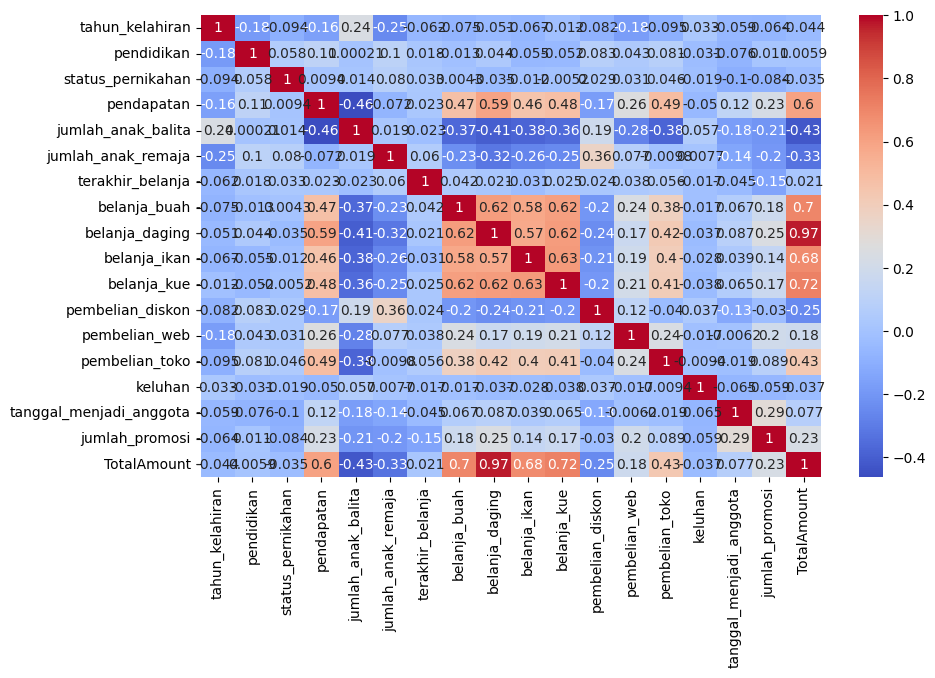

In [49]:
# Cek korelasi
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.show()
     

# Data Processing

In [ ]:
# test_cleaned = test.drop('ID', axis=1)
# test_cleaned

In [50]:
# Memilih fitur yang akan digunakan untuk prediksi
features = ['tahun_kelahiran', 'pendidikan', 'status_pernikahan', 'pendapatan',
       'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja',
       'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan',
       'tanggal_menjadi_anggota', 'TotalAmount']
target = 'jumlah_promosi'
     

In [51]:
x = train[features]
y = train[target]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [53]:
print('X_train shape: ', x_train.shape)
print('X_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (3053, 13)
X_test shape:  (764, 13)
y_train shape:  (3053,)
y_test shape:  (764,)


# Membangun Model

In [55]:
from xgboost import XGBClassifier

In [56]:
# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_opt = XGBClassifier(max_depth=10,
                        learning_rate=0.05,
                        n_estimators=900, 
                        min_child_weight=3,
                        scale_pos_weight=2,
                        subsample=1,
                        colsample_bytree=1,
                        colsample_bylevel=1 ,
                        reg_alpha=1 ,
                        reg_lambda=0.1,
                        max_delta_step=7 ,
                        gamma=0,
                        random_state=0)

# Train the XGBoost classifier
xgb_opt.fit(x_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [22:15:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=7, max_depth=10,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=900,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [57]:
def metrics_calculator(clf, x_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(x_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [58]:
def model_evaluation(clf, x_train, x_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports and confusion matrix
    '''
    # Set font scale
    sns.set(font_scale=1.5)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(x_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(x_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')
    
    # Create figure and subplots 
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, colorbar=False, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
            
    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, x_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 3.6)
    table.set_fontsize(12)
    ax2.axis('tight')
    # Hide the axes
    ax2.axis('off')
    # set the title
    ax2.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('purple')
              
    plt.tight_layout()
    plt.show() 


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       786
           1       1.00      1.00      1.00       412
           2       1.00      1.00      1.00       311
           3       1.00      1.00      1.00       378
           4       1.00      1.00      1.00       412
           5       1.00      1.00      1.00       445
           6       1.00      1.00      1.00       309

    accuracy                           1.00      3053
   macro avg       1.00      1.00      1.00      3053
weighted avg       1.00      1.00      1.00      3053


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.72      0.65       197
           1       0.48      0.34      0.40       103
           2       0.71      0.62      0.66  

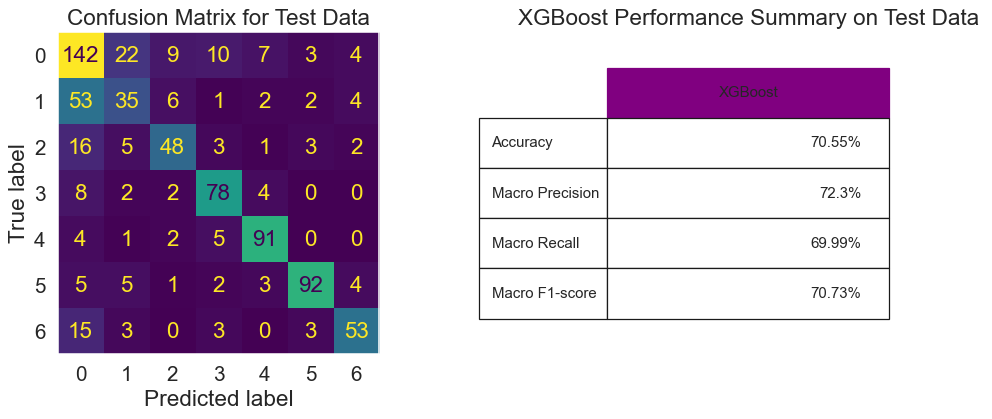

In [59]:
model_evaluation(xgb_opt, x_train, x_test, y_train, y_test, 'XGBoost')

# Competition Submission

In [60]:
column_to_drop = ['ID', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']

test_final = test.drop(columns=column_to_drop)
test_final

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,TotalAmount
0,1957,3,6,120660151.0,0.0,1.0,63.0,4.0,6.0,10.0,0.0,545,962173.0
1,1968,5,3,163551821.0,0.0,1.0,58.0,2.0,5.0,10.0,0.0,545,493573.0
2,1968,2,3,29857000.0,0.0,0.0,34.0,2.0,0.0,5.0,0.0,288,86989.0
3,1971,5,3,117949098.0,0.0,1.0,82.0,3.0,5.0,7.0,0.0,545,140678.0
4,1974,3,2,164761134.0,0.0,0.0,28.0,0.0,1.0,8.0,0.0,545,2103642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1984,4,1,66320000.0,1.0,0.0,19.0,4.0,0.0,6.0,1.0,454,60690.0
3814,1972,3,3,159651946.0,0.0,0.0,90.0,0.0,6.0,8.0,0.0,545,1319477.0
3815,1968,4,2,84058923.0,0.0,1.0,46.0,0.0,0.0,1.0,0.0,545,77725.0
3816,1966,3,2,106301000.0,0.0,1.0,74.0,3.0,5.0,3.0,0.0,417,95081.0


In [61]:
train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,TotalAmount
0,1979,3,2,0.0,0.0,1.0,0.0,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,519,2,382347.0
1,1950,3,2,84063000.0,0.0,0.0,70.0,6069.0,44506.0,80920.0,20230.0,7.5,6.0,4.0,0.0,186,0,151725.0
2,1966,3,3,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,564,1,624985.0
3,1961,4,2,165579620.0,0.0,0.0,90.0,195246.5,1542405.5,27725.0,125868.0,0.0,7.0,8.0,0.0,564,4,1973840.0
4,1970,3,2,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,564,4,476553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,4,3,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,564,5,41686.0
3813,1947,5,2,109306000.0,0.0,1.0,44.0,0.0,50575.0,0.0,0.0,3.0,6.0,3.0,0.0,547,1,50575.0
3814,1974,4,3,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,375,0,72828.0
3815,1957,2,2,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,0.0,4.0,5.0,4.0,0.0,270,0,113288.0


In [62]:
test_final

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,TotalAmount
0,1957,3,6,120660151.0,0.0,1.0,63.0,4.0,6.0,10.0,0.0,545,962173.0
1,1968,5,3,163551821.0,0.0,1.0,58.0,2.0,5.0,10.0,0.0,545,493573.0
2,1968,2,3,29857000.0,0.0,0.0,34.0,2.0,0.0,5.0,0.0,288,86989.0
3,1971,5,3,117949098.0,0.0,1.0,82.0,3.0,5.0,7.0,0.0,545,140678.0
4,1974,3,2,164761134.0,0.0,0.0,28.0,0.0,1.0,8.0,0.0,545,2103642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1984,4,1,66320000.0,1.0,0.0,19.0,4.0,0.0,6.0,1.0,454,60690.0
3814,1972,3,3,159651946.0,0.0,0.0,90.0,0.0,6.0,8.0,0.0,545,1319477.0
3815,1968,4,2,84058923.0,0.0,1.0,46.0,0.0,0.0,1.0,0.0,545,77725.0
3816,1966,3,2,106301000.0,0.0,1.0,74.0,3.0,5.0,3.0,0.0,417,95081.0


In [63]:
# Define features(X) and output labels(y)
x = train[features]
y = train[target]

In [64]:
# Initialize the XGBoost Classifier using optimal hyperparameters

xgb_final = XGBClassifier(max_depth=10,
                        learning_rate=0.05,
                        n_estimators=900, 
                        min_child_weight=3,
                        scale_pos_weight=2,
                        subsample=1,
                        colsample_bytree=1,
                        colsample_bylevel=1 ,
                        reg_alpha=1 ,
                        reg_lambda=0.1,
                        max_delta_step=7 ,
                        gamma=0,
                        random_state=0)

In [65]:
# Train the model on the whole dataset
xgb_final.fit(x, y)

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [22:16:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=7, max_depth=10,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=900,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [66]:
# Target prediction for test.csv samples using relavant features
y_pred = xgb_final.predict(test_final)

In [67]:
submission = pd.DataFrame({'ID': test['ID'], 'jumlah_promosi': y_pred})
submission

,ID,jumlah_promosi
0,2241,0
1,2274,0
2,1107,0
3,4478,0
4,5080,0
...,...,...
3813,271,0
3814,3334,1
3815,3478,1
3816,89,1


In [68]:
submission.to_csv('Submission5.csv', index=False)

In [ ]:
# tori = pd.read_csv('Submission.csv')
# tori.head(50)